<a href="https://colab.research.google.com/github/shreyapande1/Bank-client-subscription-prediction/blob/main/Bank_Client_subscription_prediction_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Submitted By: Shreya Pande

# Importing Dataset

Importing required libraries

In [161]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.graph_objects as go

Let's view our dataset first

In [162]:
url = "https://raw.githubusercontent.com/shreyapande1/Bank-client-subscription-prediction/main/bank-additional-full.csv"
df = pd.read_csv(url, sep=';')

In [163]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Exploratory Data Analysis

Summary statistics

In [164]:
# We want to include the non-numerical columns as well, hence we use include='all'
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


Checking the Null values

<Axes: >

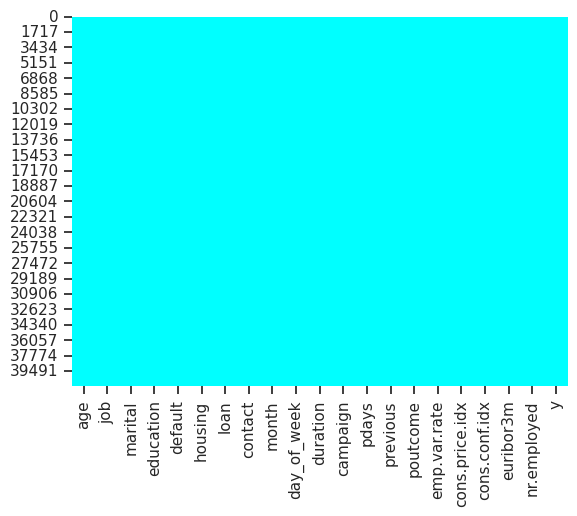

In [165]:
# Using Heatmap Vizualization:

sns.heatmap(df.isna(),cmap="cool", cbar=False)

#Insight: At High level there are no Missing values

In [166]:
# For quality checking purposes, we explore and use various other methods to verify id our data is free of null values

In [167]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [168]:
# We can safely conclude that our data does not have any missing values

Visualizations to understand the distribution of data

In [169]:
df.education.unique()
#df

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [170]:
# Get Age in 'AgeCategory' format

df.loc[df['age']  <= 25, 'ageCategory'] = 'Below 25'
df.loc[(df['age']  >25) & (df['age']  <= 35), 'ageCategory'] = '25-35'
df.loc[(df['age']  >35) & (df['age']  <= 45), 'ageCategory'] = '35-45'
df.loc[(df['age']  >45) & (df['age']  <= 55), 'ageCategory'] = '45-55'
df.loc[df['age']  >= 55, 'ageCategory'] = '55 & above'

In [171]:
df1 = df.groupby(['education', 'ageCategory'])['y'].count().reset_index()
df1.columns=["source", "target","value"]
#Same activity Gender is the Source and survived or not survied as 
df2=df.reset_index()
df3 = df2.groupby(['ageCategory','y'])['index'].count().reset_index()
df3.columns=["source", "target","value"]

#Change the Col Names
df3
df_concat=pd.concat([df1, df3], axis=0)
source_target=list(pd.unique(df_concat[["source","target"]].values.ravel('K')))
#Creating a Dictonary
mapping_dict = {k: v for v, k in enumerate(source_target)}

In [172]:
df_concat['source'] = df_concat['source'].map(mapping_dict)
df_concat['target'] = df_concat['target'].map(mapping_dict)

In [173]:
#Creating a Dictonary
mapping_dict = {k: v for v, k in enumerate(source_target)}
#Modifing the DataFrame
links_dict=df_concat.to_dict(orient="list")

In [174]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "orchid", width = 0.7),
      label = source_target,
      color = "plum"
    ),
    link = dict(
      source = links_dict["source"],
      target = links_dict["target"],
      value = links_dict["value"]
  ))])

In [175]:
fig.update_layout(title_text= "Sankey Diagram for prediction of client subscription", font_size=10)
fig.show()
# From this, we can see that we have very less number of Individulas who are subscriping for term deposit
# and we  may need to upsample our data
#Insight 2:
# Majority of our dataset has people from the age group of 25-35, followed by 35-45

In [179]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'ageCategory'],
      dtype='object')

In [180]:
df_chart = df.groupby(['y','marital','education'])['job'].count().reset_index()

In [181]:
fig=px.sunburst(df_chart, path=['y','marital','education'],values='job',width=800,height=600)
fig.show()
# Married people are more likely to get a term deposit subscription

In [182]:
df.pdays.unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

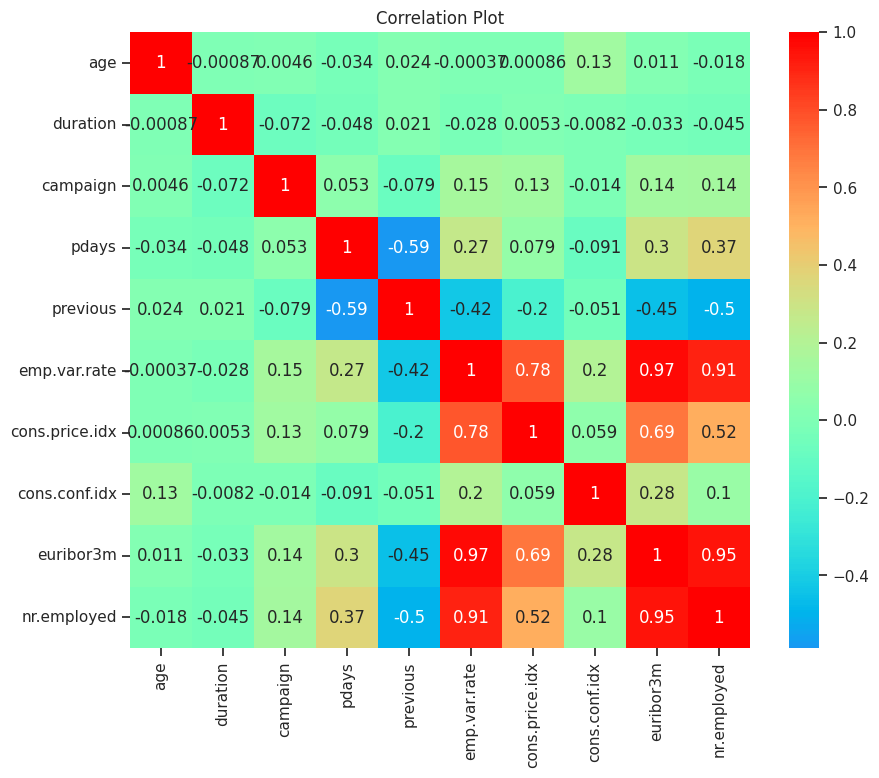

In [183]:
# Correlation Plot of the Numerical Data
plt.figure(figsize=(10, 8))
x=df.select_dtypes(include=np.number)
corr_matrix = x.corr()

corr_matrix = df.corr()

# Create the correlation plot using a heatmap
sns.heatmap(corr_matrix, cmap='rainbow', center=0, annot=True)

# Set the title of the plot
plt.title('Correlation Plot')

# Show the plot
plt.show()

In [185]:
import math
import warnings
warnings.filterwarnings('ignore')

In [186]:
columns = x.columns
num_cols_per_row = 4
num_rows = math.ceil(len(columns) / num_cols_per_row)

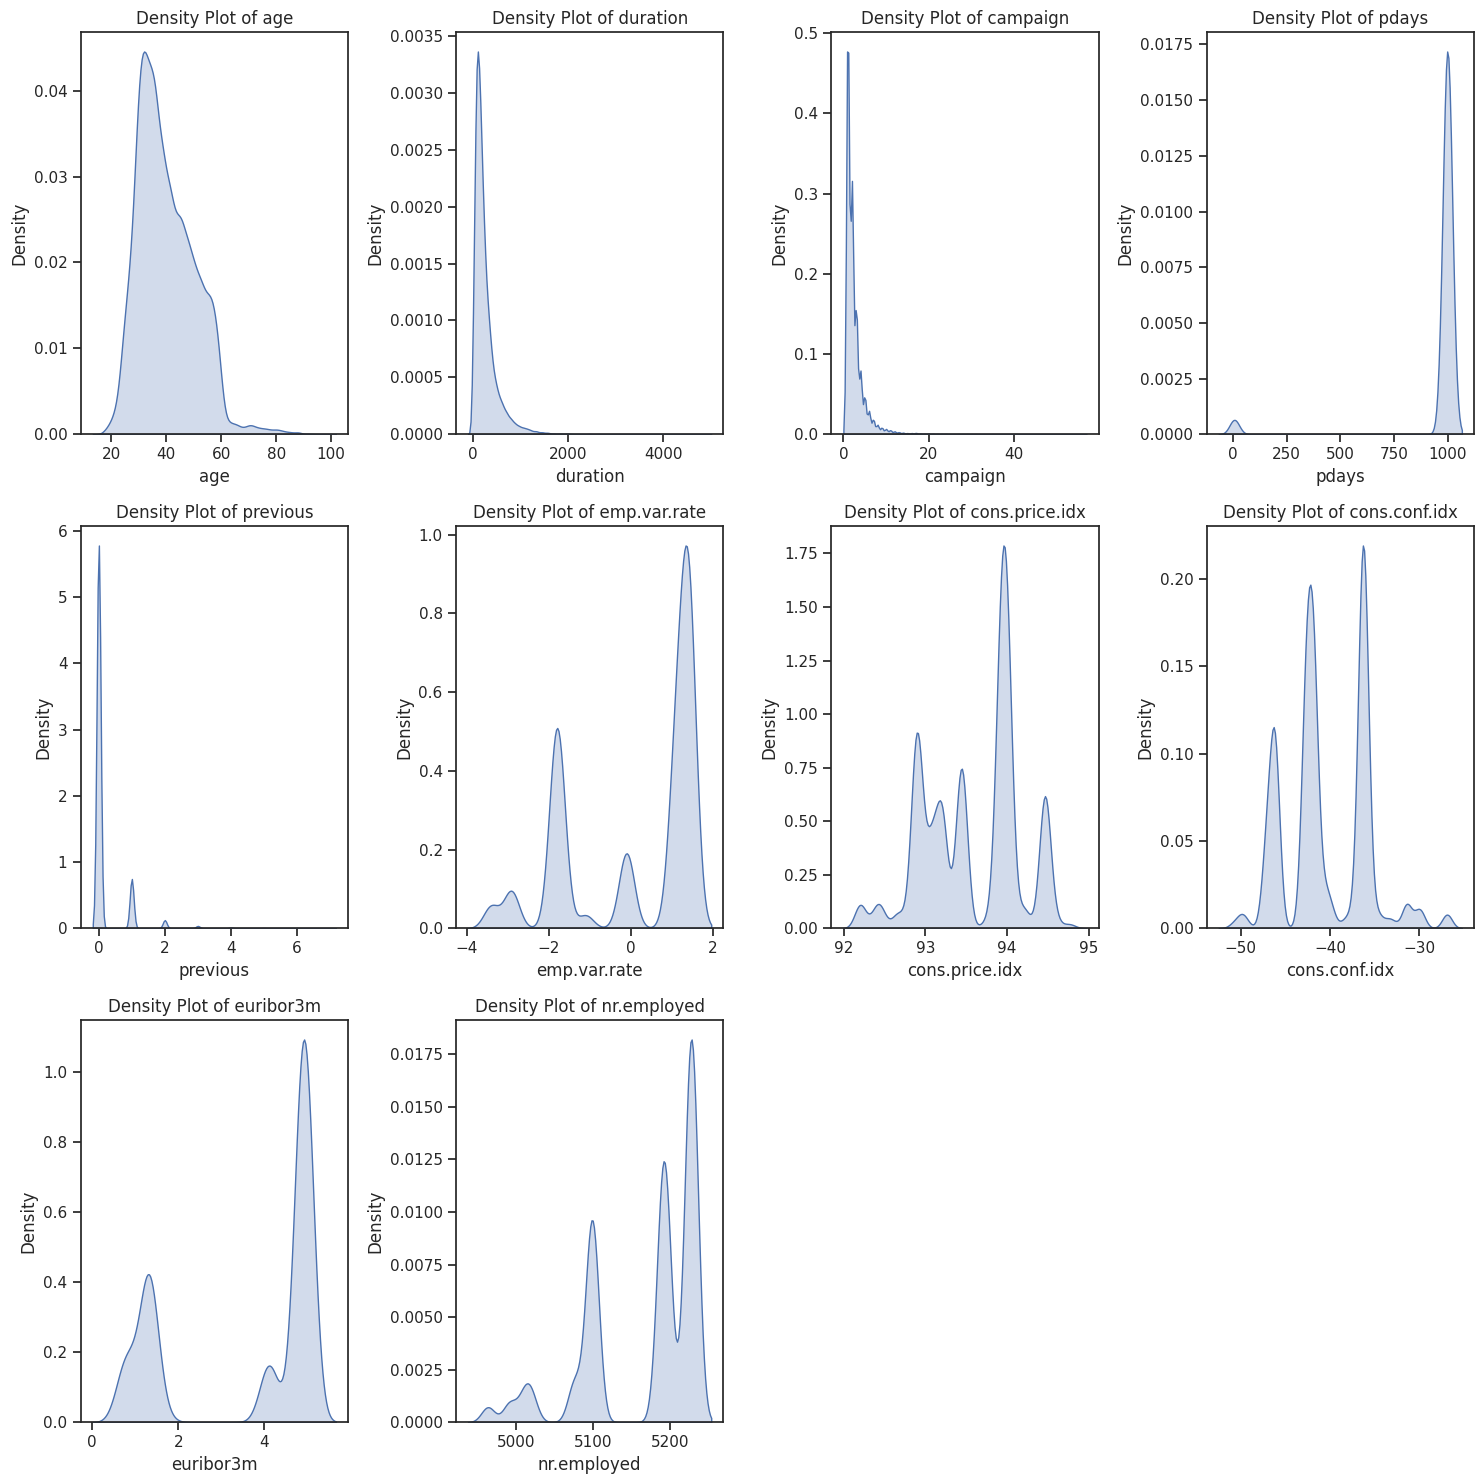

In [187]:
# get grid of plots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(15, 5*num_rows))

#putting plots in loop
for i, column in enumerate(columns):
    row_index = i // num_cols_per_row
    col_index = i % num_cols_per_row
    
    # create a density plot for the current column
    sns.kdeplot(df[column], shade=True, ax=axes[row_index][col_index])
    axes[row_index][col_index].set_xlabel(column)
    axes[row_index][col_index].set_ylabel('Density')
    axes[row_index][col_index].set_title('Density Plot of ' + column)

# remove empty plots
for j in range(len(columns) % num_cols_per_row, num_cols_per_row):
    fig.delaxes(axes[num_rows-1][j])
    plt.tight_layout()
plt.show()



# Data Cleaning

The only steps that remain before running the machine learning model are:

1. Removal of any outliers
2. Getting categorical data in numerical
3. Oversampling -> as we saw earlier, dataset seems a little imbalanced

In [188]:
# Removing Outliers

In [189]:
def out_remover(df):
  for i in df.columns:
    #Selecting the numerical columns in the Datset
    if(np.issubdtype(df[i].dtype, np.number)==True):
      #Defining q1 and q3
      q1, q3 = np.percentile(df[i],[25, 75])
      iqr = q3 - q1
      inner_fence = q1 - 1.5 * iqr
      outer_fence = q3 + 1.5 * iqr
      #Filtering the Data
      df=df[(df[i] >= inner_fence) & (df[i] <= outer_fence)]

In [190]:
out_remover(df)

In [191]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [192]:
# Converting categorical columns to numerical values

In [193]:
non_numeric_cols = list(df.select_dtypes(exclude=['number']).columns)
non_numeric_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y',
 'ageCategory']

In [194]:
# One-hot encoding
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])

# Convert the 'y' column to a binary numeric value
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [195]:
df.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'ageCategory', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'm

In [196]:
df = df.drop('ageCategory', axis=1)

In [197]:
# Checking if all categorical values are removed
df.dtypes

age                     int64
duration                int64
campaign                int64
pdays                   int64
previous                int64
                        ...  
day_of_week_tue         uint8
day_of_week_wed         uint8
poutcome_failure        uint8
poutcome_nonexistent    uint8
poutcome_success        uint8
Length: 64, dtype: object

In [198]:
# OverSampling

In [199]:
from imblearn.over_sampling import SMOTE

In [200]:
X = df.drop('y', axis=1)
y = df['y']

In [201]:
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X, y)
df_upsampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)

In [202]:
print('Pre SMOTE:', y.value_counts())
print('Post SMOTE:', y_resampled.value_counts())

Pre SMOTE: 0    36548
1     4640
Name: y, dtype: int64
Post SMOTE: 0    36548
1    36548
Name: y, dtype: int64


In [203]:
# Our oversampled set has 50% subscription rate

# Classification Models

For all the models, the data is split in 75:25 for train test split

In [204]:
print("Running Decision Tree Algorithm")

Running Decision Tree Algorithm


In [205]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [206]:
X = df_upsampled.drop('y', axis=1)
y = df_upsampled['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
cllsie = DecisionTreeClassifier(random_state=42)
cllsie.fit(X_train, y_train)
y_pred = cllsie.predict(X_test)

Accuracy for Decision Tree: 0.93
Sensitivity for Decision Tree: 0.94
F1 score for Decision Tree: 0.9314978695509668
MAE for Decision Tree: 0.06862208602385904
MSE for Decision Tree: 0.06862208602385904
Confusion matrix for Decision Tree:
 [[8494  673]
 [ 581 8526]]
AUC for Decision Tree: 0.9313937043334681


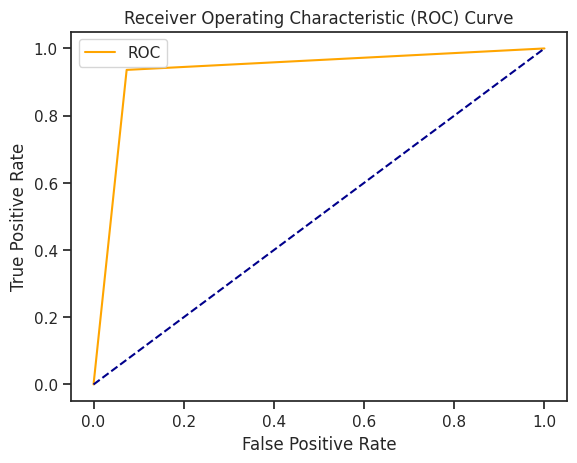

In [207]:
# Model Evaluation
from sklearn.metrics import accuracy_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

print("Accuracy for Decision Tree: {:.2f}".format(accuracy))
print("Sensitivity for Decision Tree: {:.2f}".format(sensitivity))
print('F1 score for Decision Tree:', f1)
print('MAE for Decision Tree:', mae)
print('MSE for Decision Tree:', mse)
print('Confusion matrix for Decision Tree:\n', cm)
print('AUC for Decision Tree:', auc)

# Plot ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [208]:
print("Running Random Forest Algorithm")

Running Random Forest Algorithm


In [209]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [210]:
X = df_upsampled.iloc[:, :-1]
y = df_upsampled.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [211]:
# Creating a Random Forest Classifier with 100 decision trees
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest_classifier.fit(X_train, y_train)
y_pred = random_forest_classifier.predict(X_test)

Accuracy for Random Forest: 0.95
Sensitivity for Random Forest: 0.95
F1 score for Random Forest: 0.9521229544449358
MAE for Random Forest: 0.04738973404837474
MSE for Random Forest: 0.04738973404837474
Confusion matrix for Random Forest:
 [[8797  370]
 [ 496 8611]]
AUC for Random Forest: 0.9525871159612883


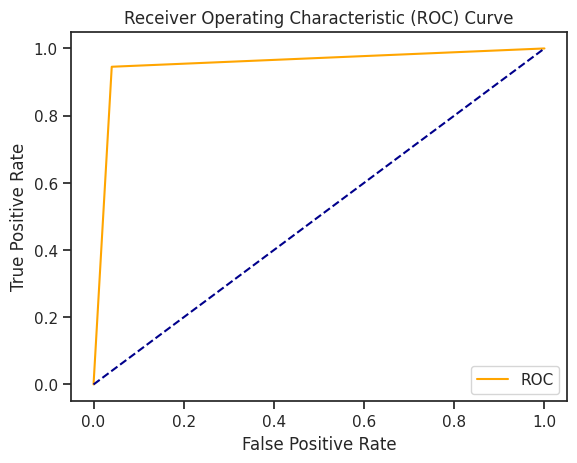

In [212]:
# Model Evaluation
from sklearn.metrics import accuracy_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

print("Accuracy for Random Forest: {:.2f}".format(accuracy))
print("Sensitivity for Random Forest: {:.2f}".format(sensitivity))
print('F1 score for Random Forest:', f1)
print('MAE for Random Forest:', mae)
print('MSE for Random Forest:', mse)
print('Confusion matrix for Random Forest:\n', cm)
print('AUC for Random Forest:', auc)

# Plot ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [213]:
print("Running Naive Bayes classification algorithm")

Running Naive Bayes classification algorithm


In [214]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score

In [215]:
X = df_upsampled.drop(['y'], axis=1) 
y = df_upsampled["y"]

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Accuracy for Naive Bais: 0.88
Sensitivity for Naive Bais : 0.90
F1 score for Naive Bais: 0.8860951555218382
MAE for Naive Bais: 0.11502681405275254
MSE for Naive Bais: 0.11502681405275254
Confusion matrix for Naive Bais:
 [[7996 1171]
 [ 931 8176]]
AUC for Naive Bais: 0.8850150680007416


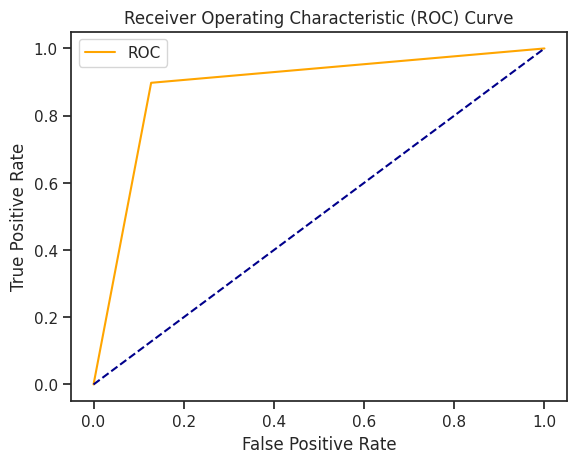

In [217]:
# Model Evaluation
from sklearn.metrics import accuracy_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

print("Accuracy for Naive Bais: {:.2f}".format(accuracy))
print("Sensitivity for Naive Bais : {:.2f}".format(sensitivity))
print('F1 score for Naive Bais:', f1)
print('MAE for Naive Bais:', mae)
print('MSE for Naive Bais:', mse)
print('Confusion matrix for Naive Bais:\n', cm)
print('AUC for Naive Bais:', auc)

# Plot ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [218]:
print("Running  Gradient Boosting Classifier")

Running  Gradient Boosting Classifier


In [219]:
import missingno as msno
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix
import os
from sklearn.utils import resample

In [220]:
X = df_upsampled.drop(columns='y')
y = df_upsampled['y']

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=True)

In [222]:
GBCModel = GradientBoostingClassifier(n_estimators=150, max_depth=15, learning_rate=0.4, random_state=44)
GBCModel.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.4, max_depth=15, n_estimators=150,
                           random_state=44)

In [159]:
y_pred = GBCModel.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)

Accuracy for Gradient Boosting: 0.95
Sensitivity for Gradient Boosting : 0.95
F1 score for Gradient Boosting: 0.9536721923372489
MAE for Gradient Boosting: 0.046185837802342124
MSE for Gradient Boosting: 0.046185837802342124
Confusion matrix for Gradient Boosting:
 [[8743  416]
 [ 428 8687]]
AUC for Gradient Boosting: 0.953812313299443


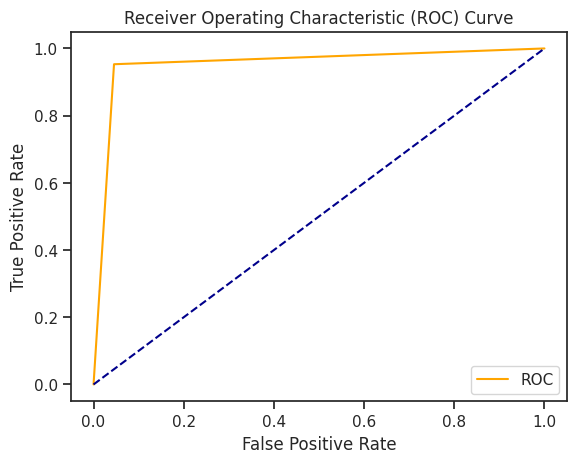

In [160]:
# Model Evaluation
from sklearn.metrics import accuracy_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

print("Accuracy for Gradient Boosting: {:.2f}".format(accuracy))
print("Sensitivity for Gradient Boosting : {:.2f}".format(sensitivity))
print('F1 score for Gradient Boosting:', f1)
print('MAE for Gradient Boosting:', mae)
print('MSE for Gradient Boosting:', mse)
print('Confusion matrix for Gradient Boosting:\n', cm)
print('AUC for Gradient Boosting:', auc)

# Plot ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()